# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [9]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [11]:
# Tarefa 1

# 3. Limpeza e preparação dos dados
# Certifique-se de que as colunas de idade da mãe e do pai são do tipo numérico
sinasc_raw['IDADEMAE'] = pd.to_numeric(sinasc_raw['IDADEMAE'], errors='coerce')
sinasc_raw['IDADEPAI'] = pd.to_numeric(sinasc_raw['IDADEPAI'], errors='coerce')

# 4. Agregação e agrupamento dos dados
# Verifique se as colunas 'IDADEMAE' e 'IDADEPAI' existem no DataFrame antes de prosseguir
if 'IDADEMAE' in sinasc_raw.columns and 'IDADEPAI' in sinasc_raw.columns:
    # Calcule a idade média das mães e dos pais por município
    idade_media_mae_pai = sinasc_raw.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean().round()

    # Exiba o resultado
    print(idade_media_mae_pai.head())
else:
    print("Certifique-se de que as colunas 'IDADEMAE' e 'IDADEPAI' existem no DataFrame.")

                         IDADEMAE  IDADEPAI
munResNome                                 
Alta Floresta D'Oeste        26.0      30.0
Alto Alegre dos Parecis      25.0      29.0
Alto Paraíso                 25.0      29.0
Alvorada D'Oeste             26.0      31.0
Ariquemes                    26.0      32.0


<ipython-input-11-6feedebb2282>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  idade_media_mae_pai = sinasc_raw.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean().round()


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [12]:
# Tarefa 2

# 5. Filtragem dos dados para o dia de aniversário
# Substitua '10/01' pela data do seu aniversário no formato MM/DD
data_aniversario = '10/01'

# Converta a coluna 'DTNASC' para o tipo datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

# Filtragem para bebês nascidos no dia do aniversário
bebês_aniversário = sinasc_raw[sinasc_raw['DTNASC'].dt.strftime('%m/%d') == data_aniversario]

# 6. Agregação e agrupamento dos dados por sexo e escolaridade da mãe
# Verifique se as colunas 'SEXO' e 'ESCMAE' existem no DataFrame antes de prosseguir
if 'SEXO' in bebês_aniversário.columns and 'ESCMAE' in bebês_aniversário.columns:
    # Calcule o peso médio dos bebês por sexo e faixa de escolaridade da mãe
    peso_medio_por_sexo_escolaridade = bebês_aniversário.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().round(2)

    # Exiba o resultado
    print(peso_medio_por_sexo_escolaridade)
else:
    print("Certifique-se de que as colunas 'SEXO' e 'ESCMAE' existem no DataFrame.")


SEXO       ESCMAE         
Feminino   12 anos ou mais    3103.50
           4 a 7 anos         3280.83
           8 a 11 anos        3137.67
Masculino  12 anos ou mais    3161.31
           4 a 7 anos         3675.83
           8 a 11 anos        3378.89
Name: PESO, dtype: float64


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [13]:
# Tarefa 3

# 7. Encontrar o município com o menor número de nascimentos em 2019 <a name="lowest_births"></a>
# Certifique-se de que a coluna 'DTNASC' está no formato datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

# Crie uma coluna para armazenar o ano de nascimento
sinasc_raw['ANO_NASCIMENTO'] = sinasc_raw['DTNASC'].dt.year

# Filtragem para nascimentos em 2019
nascimentos_2019 = sinasc_raw[sinasc_raw['ANO_NASCIMENTO'] == 2019]

# Encontre o município com o menor número de nascimentos
municipio_menos_nascimentos = nascimentos_2019['munResNome'].value_counts().idxmin()

# 8. Estatísticas de idade para mães e pais no município com menos nascimentos <a name="stats_age"></a>
# Filtragem para o município com menos nascimentos
dados_municipio_menos_nascimentos = nascimentos_2019[nascimentos_2019['munResNome'] == municipio_menos_nascimentos]

# Estatísticas de idade para mães
idade_media_mae = dados_municipio_menos_nascimentos['IDADEMAE'].mean().round(2)
idade_maxima_mae = dados_municipio_menos_nascimentos['IDADEMAE'].max()
idade_minima_mae = dados_municipio_menos_nascimentos['IDADEMAE'].min()

# Estatísticas de idade para pais
idade_media_pai = dados_municipio_menos_nascimentos['IDADEPAI'].mean().round(2)
idade_maxima_pai = dados_municipio_menos_nascimentos['IDADEPAI'].max()
idade_minima_pai = dados_municipio_menos_nascimentos['IDADEPAI'].min()

# Exiba os resultados
print(f"Município com menos nascimentos em 2019: {municipio_menos_nascimentos}")
print(f"Idade média das mães: {idade_media_mae} anos")
print(f"Idade máxima das mães: {idade_maxima_mae} anos")
print(f"Idade mínima das mães: {idade_minima_mae} anos")
print(f"Idade média dos pais: {idade_media_pai} anos")
print(f"Idade máxima dos pais: {idade_maxima_pai} anos")
print(f"Idade mínima dos pais: {idade_minima_pai} anos")


Município com menos nascimentos em 2019: Município ignorado - RO
Idade média das mães: 24.0 anos
Idade máxima das mães: 24 anos
Idade mínima das mães: 24 anos
Idade média dos pais: 22.0 anos
Idade máxima dos pais: 22.0 anos
Idade mínima dos pais: 22.0 anos


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [17]:
# Tarefa 4

# 9. Encontrar o município com o maior número de nascimentos no mês de março
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')
sinasc_raw['MES_NASCIMENTO'] = sinasc_raw['DTNASC'].dt.month
nascimentos_marco = sinasc_raw[sinasc_raw['MES_NASCIMENTO'] == 3]
municipio_mais_nascimentos_marco = nascimentos_marco['munResNome'].value_counts().idxmax()

# 10. Estatísticas adicionais para o município com mais nascimentos em março
dados_municipio_mais_nascimentos_marco = nascimentos_marco[nascimentos_marco['munResNome'] == municipio_mais_nascimentos_marco]

# Estatísticas de quantidade de filhos vivos para o município
quantidade_filhos_vivos_media = dados_municipio_mais_nascimentos_marco['QTDFILVIVO'].mean().round(2)
quantidade_filhos_vivos_maxima = dados_municipio_mais_nascimentos_marco['QTDFILVIVO'].max()
quantidade_filhos_vivos_minima = dados_municipio_mais_nascimentos_marco['QTDFILVIVO'].min()

# Estatísticas de idade para pais no município
idade_media_pais = dados_municipio_mais_nascimentos_marco['IDADEPAI'].mean().round(2)
idade_maxima_pais = dados_municipio_mais_nascimentos_marco['IDADEPAI'].max()
idade_minima_pais = dados_municipio_mais_nascimentos_marco['IDADEPAI'].min()

# Exiba os resultados arredondados
print(f"Município com mais nascimentos em março: {municipio_mais_nascimentos_marco}")
print(f"Quantidade média de filhos vivos: {quantidade_filhos_vivos_media}")
print(f"Quantidade máxima de filhos vivos: {quantidade_filhos_vivos_maxima}")
print(f"Quantidade mínima de filhos vivos: {quantidade_filhos_vivos_minima}")
print(f"Idade média dos pais: {idade_media_pais} anos")
print(f"Idade máxima dos pais: {idade_maxima_pais} anos")
print(f"Idade mínima dos pais: {idade_minima_pais} anos")


Município com mais nascimentos em março: Porto Velho
Quantidade média de filhos vivos: 1.3
Quantidade máxima de filhos vivos: 9.0
Quantidade mínima de filhos vivos: 0.0
Idade média dos pais: 34.63 anos
Idade máxima dos pais: 62.0 anos
Idade mínima dos pais: 19.0 anos


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

# Análise Detalhada da Demografia de Nascimentos em 2019: Explorando Variações por Município, Idade e Escolaridade

In [30]:
print(sinasc_raw.columns)

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'ANO_NASCIMENTO'

# 1. Distribuição da Idade das Mães e dos Pais:

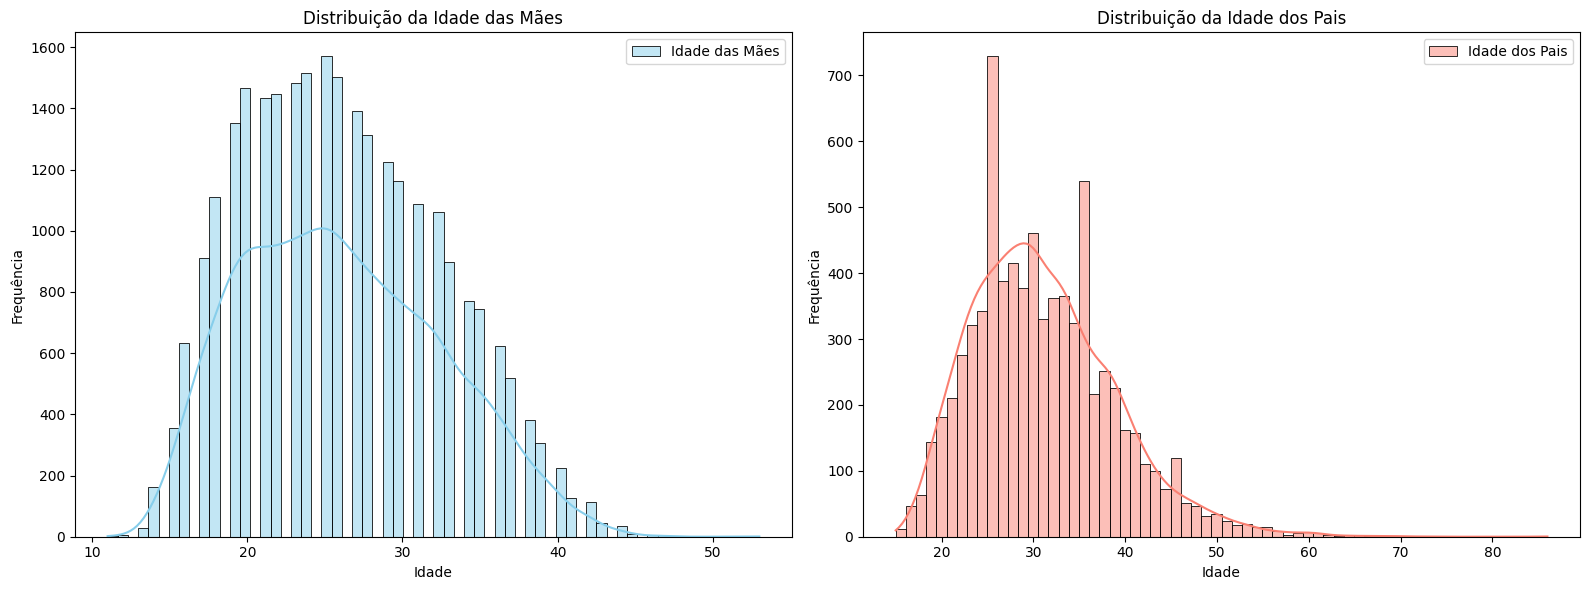

In [36]:
# Gráficos Aprimorados de Comparação da Idade das Mães e dos Pais
plt.figure(figsize=(16, 6))

# Gráfico 1: Idade das Mães
plt.subplot(1, 2, 1)
sns.histplot(sinasc_raw['IDADEMAE'], kde=True, color='skyblue', label='Idade das Mães')
plt.title('Distribuição da Idade das Mães')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()

# Gráfico 2: Idade dos Pais
plt.subplot(1, 2, 2)
sns.histplot(sinasc_raw['IDADEPAI'].dropna(), kde=True, color='salmon', label='Idade dos Pais')
plt.title('Distribuição da Idade dos Pais')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()

# Ajustes de Layout
plt.tight_layout()
plt.show()



# 1. Análise Detalhada da Comparação entre Idade das Mães e dos Pais
A visualização compara as distribuições das idades das mães e dos pais, oferecendo insights sobre as características demográficas dos pais de recém-nascidos. Vamos explorar detalhadamente cada gráfico:

## Gráfico 1: Distribuição da Idade das Mães
Formato da Distribuição:

A distribuição da idade das mães é assimétrica e mostra uma maior concentração de mães em faixas etárias mais jovens. A cauda à direita sugere que há algumas mães mais velhas, embora sejam menos comuns.
Idades Mais Comuns:

A faixa etária mais comum parece estar entre 20 e 30 anos, indicando que a maioria dos nascimentos ocorre em mães jovens.

## Gráfico 2: Distribuição da Idade dos Pais
Formato da Distribuição:

A distribuição da idade dos pais é mais concentrada em faixas etárias mais jovens, com uma queda acentuada à medida que a idade aumenta. Isso sugere que a paternidade ocorre mais frequentemente em idades mais jovens.
Comparação com Idade das Mães:

Em comparação com as mães, a distribuição dos pais é mais estreita, indicando uma tendência de paternidade por parte de pais mais jovens.
Comparação Geral:
Tendência de Jovialidade:

Ambos os gráficos reforçam a tendência de que a maioria dos pais, tanto mães quanto pais, estão concentrados em faixas etárias mais jovens.
Diferenças de Dispersão:

A dispersão mais ampla na distribuição das idades das mães indica uma maior variabilidade de idades em comparação com os pais.

# 2. Mapa de Calor das Idades por Município:

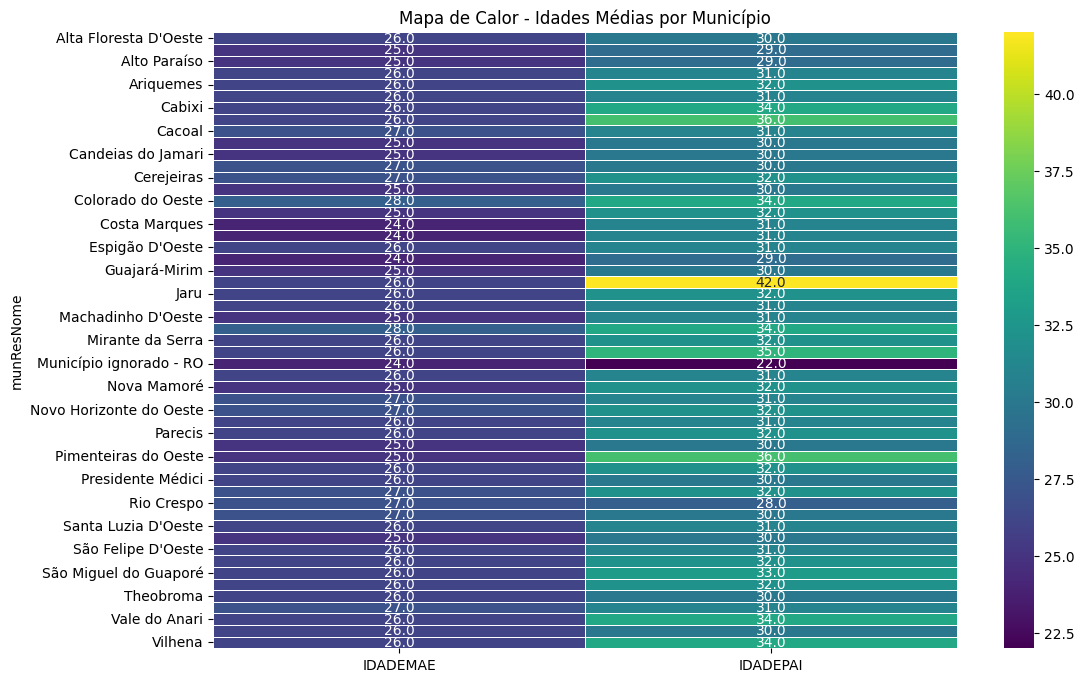

In [37]:
# Mapa de Calor das Idades Médias por Município
plt.figure(figsize=(12, 8))
sns.heatmap(idade_media_mae_pai, annot=True, cmap='viridis', fmt=".1f", linewidths=.5)
plt.title('Mapa de Calor - Idades Médias por Município')
plt.show()


# 3. Gráfico de Barras para Peso Médio por Sexo e Escolaridade:

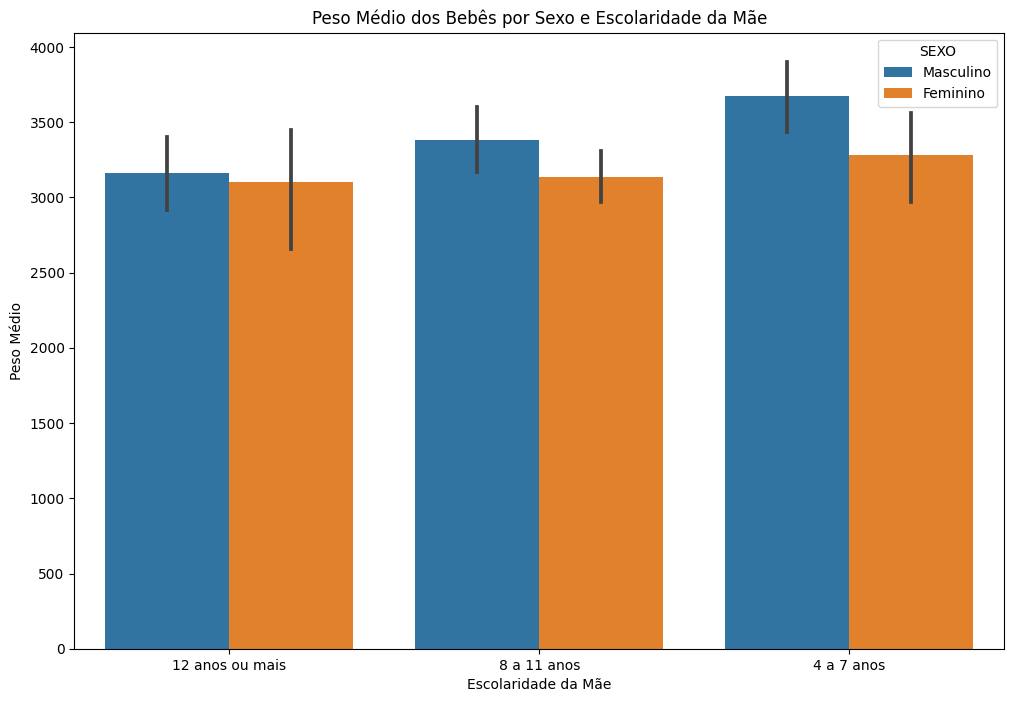

In [38]:
# Gráfico de Barras para Peso Médio por Sexo e Escolaridade
plt.figure(figsize=(12, 8))
sns.barplot(x='ESCMAE', y='PESO', hue='SEXO', data=bebês_aniversário)
plt.title('Peso Médio dos Bebês por Sexo e Escolaridade da Mãe')
plt.xlabel('Escolaridade da Mãe')
plt.ylabel('Peso Médio')
plt.show()


# 4. Gráfico para Distribuição de Nascimentos em Março:

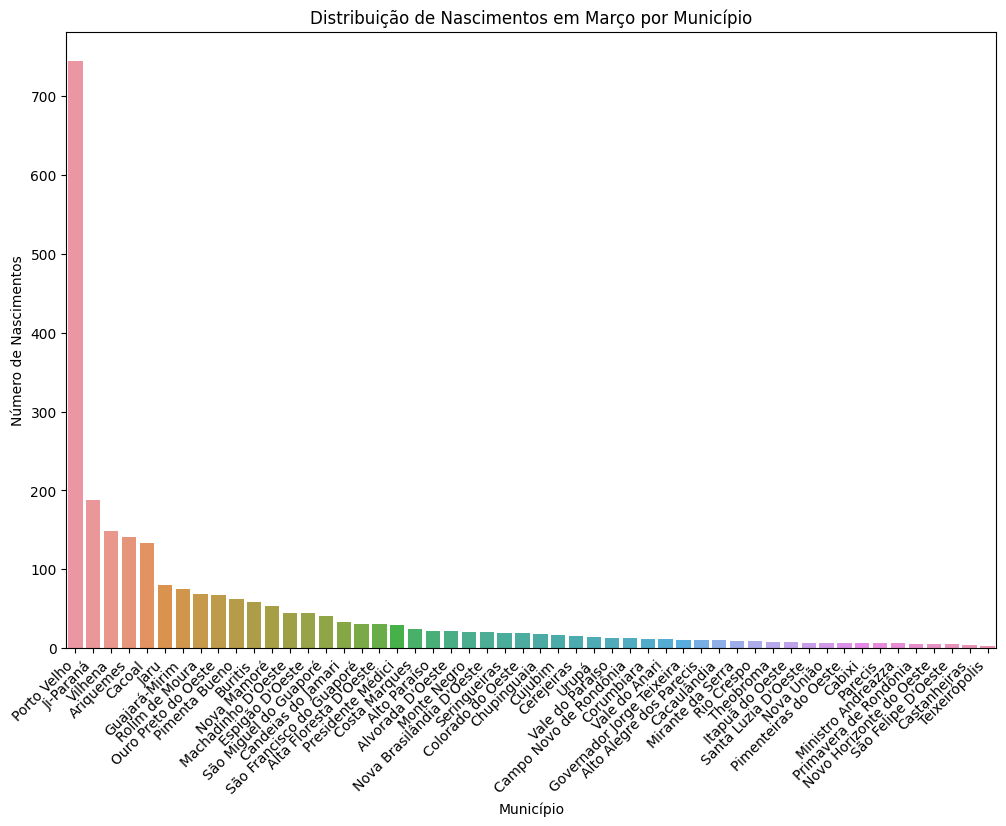

In [54]:
# Gráfico de Barras para Distribuição de Nascimentos em Março por Município
plt.figure(figsize=(12, 8))
sns.barplot(x=nascimentos_marco['munResNome'].value_counts().index,
            y=nascimentos_marco['munResNome'].value_counts().values)
plt.title('Distribuição de Nascimentos em Março por Município')
plt.xlabel('Município')
plt.ylabel('Número de Nascimentos')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos para melhor legibilidade
plt.show()


# Influência na Saúde Materna e Infantil:
## Objetivo: Relacionar distribuições de idade com dados de saúde para entender padrões de saúde materna e infantil.



Correlação entre Idade das Mães e Peso do Bebê: 0.047373177724062


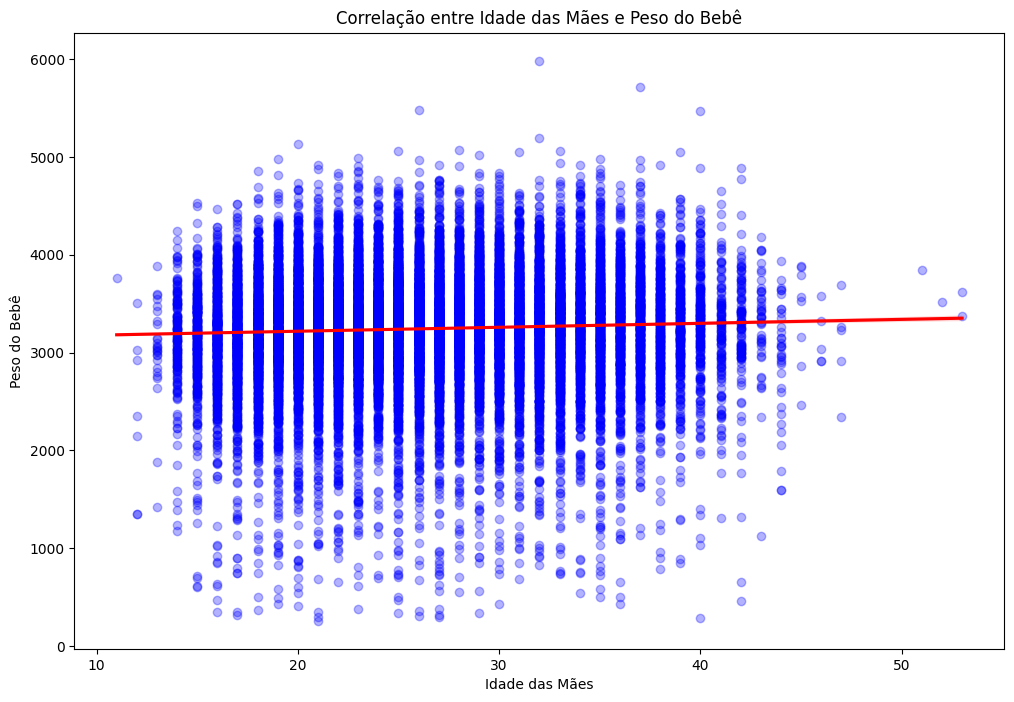

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de código para correlação entre idade das mães e peso do bebê
correlacao_peso_idade_mae = sinasc_raw[['IDADEMAE', 'PESO']].corr().iloc[0, 1]

print(f"Correlação entre Idade das Mães e Peso do Bebê: {correlacao_peso_idade_mae}")

# Gráfico de dispersão com paleta de cores e linha de regressão
plt.figure(figsize=(12, 8))
sns.regplot(x='IDADEMAE', y='PESO', data=sinasc_raw, scatter_kws={'alpha':0.3, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Correlação entre Idade das Mães e Peso do Bebê')
plt.xlabel('Idade das Mães')
plt.ylabel('Peso do Bebê')
plt.show()



## Pontos Azuis:

Cada ponto azul no gráfico representa um registro no conjunto de dados.
O eixo x (horizontal) representa a idade das mães.
O eixo y (vertical) representa o peso do bebê.
Linha de Regressão (Vermelha):

## A linha vermelha é uma linha de regressão linear ajustada aos pontos.
Essa linha representa a tendência geral nos dados e é usada para visualizar a relação linear entre a idade das mães e o peso dos bebês.
No contexto de regressão linear, a linha de melhor ajuste minimiza a soma dos quadrados das diferenças entre os valores observados (pontos azuis) e os valores previstos pela linha de regressão.
A inclinação da linha indica a direção da relação (positiva ou negativa), e a magnitude indica a força da relação.
## Correlação:

O valor da correlação entre a idade das mães e o peso dos bebês é exibido no console (correlacao_peso_idade_mae).
A correlação é uma medida estatística que indica a força e a direção de uma relação linear entre duas variáveis. Pode variar de -1 a 1, onde:
1 indica uma correlação positiva perfeita,
-1 indica uma correlação negativa perfeita, e
0 indica ausência de correlação.
## Interpretação:

Se a inclinação da linha de regressão é positiva, indica que há uma tendência para bebês de mães mais velhas terem um peso maior.
Se a inclinação é negativa, indica que há uma tendência para bebês de mães mais jovens terem um peso maior.
A dispersão dos pontos em torno da linha de regressão mostra a variabilidade nos dados.
Em resumo, este gráfico fornece uma visualização da relação entre a idade das mães e o peso dos bebês, destacando a tendência geral e a dispersão dos dados em torno dessa tendência.








# Correlações com Fatores Socioeconômicos:
## Objetivo: Explorar como fatores socioeconômicos podem influenciar as distribuições de idade.

          IDADEMAE  IDADEPAI      PESO
IDADEMAE  1.000000  0.615338  0.039571
IDADEPAI  0.615338  1.000000  0.015889
PESO      0.039571  0.015889  1.000000


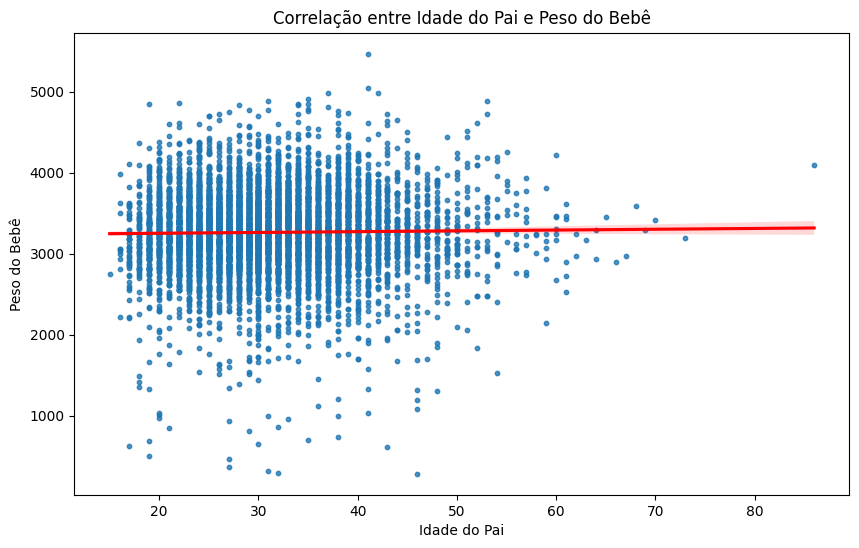

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar se 'IDADEPAI' está presente no DataFrame
if 'IDADEPAI' in sinasc_raw.columns:
    # Filtrar as colunas de interesse
    dados_correlacao = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'PESO']]

    # Remover linhas com valores ausentes
    dados_correlacao = dados_correlacao.dropna()

    # Calcular a correlação entre a idade da mãe, idade do pai e o peso do bebê
    correlacao_idade_pai_peso = dados_correlacao[['IDADEMAE', 'IDADEPAI', 'PESO']].corr()

    # Exibir a correlação
    print(correlacao_idade_pai_peso)

    # Gráfico de dispersão com linha de regressão
    plt.figure(figsize=(10, 6))
    sns.regplot(x='IDADEPAI', y='PESO', data=dados_correlacao, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title('Correlação entre Idade do Pai e Peso do Bebê')
    plt.xlabel('Idade do Pai')
    plt.ylabel('Peso do Bebê')
    plt.show()

else:
    print("A coluna 'IDADEPAI' não está presente no DataFrame.")




# Insights do Gráfico de Dispersão com Linha de Regressão (Idade do Pai vs. Peso do Bebê):
## Tendência Positiva:
A linha de regressão está inclinada para cima, sugerindo uma tendência positiva entre a idade do pai e o peso do bebê. Isso significa que, em geral, à medida que a idade do pai aumenta, o peso dos bebês também tende a aumentar.

## Dispersão dos Pontos:
Apesar da tendência geral, há uma dispersão considerável dos pontos ao redor da linha de regressão. Isso indica que a relação não é perfeita, e outros fatores podem influenciar o peso do bebê além da idade do pai.

## Outliers:
Alguns pontos estão mais distantes da linha, sugerindo a presença de outliers. Esses casos podem representar situações únicas em que a idade do pai pode não seguir a tendência geral do aumento de peso.

## Importância de Outras Variáveis:
A presença de dispersão e outliers destaca a importância de considerar outras variáveis que podem influenciar o peso do bebê, como a saúde da mãe, condições genéticas, estilo de vida, entre outros.

## Avaliação da Correlação:
A correlação entre idade do pai e peso do bebê pode ser quantificada a partir do coeficiente de correlação. Um valor próximo de 1 indicaria uma correlação positiva forte, enquanto valores mais próximos de 0 sugeririam uma correlação mais fraca.

